In [100]:
from sys import path
import pandas as pd
import numpy as np

# Adding KELMOR.py to the path
path.append("KELMOR.py") # Replace . by the folder that contains KELMOR.py

# Import KELMOR module and class
kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

# Load the dataset
DKI4 = pd.read_excel("DATA ISPU - Normalization_Forecast.xlsx", sheet_name="DKI4")
X_train = DKI4.index.values.reshape(-1, 1)
y_train = DKI4['O3'].values.reshape(-1,)

gamma_value = 0.03
C_value=300

## Laplacian Kernel

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="laplacian", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI4['O3'].min()
max_par = DKI4['O3'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'O3': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI4['O3'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.101
MSE: 0.010
MAE: 0.088
R-Squared: -1.533
       Tanggal         O3
0   2022-11-30  10.051813
1   2022-12-01  10.362694
2   2022-12-02  10.777202
3   2022-12-03  11.295337
4   2022-12-04  11.502591
5   2022-12-05  12.124352
6   2022-12-06  12.227979
7   2022-12-07  12.435233
8   2022-12-08  12.953368
9   2022-12-09  13.367876
10  2022-12-10  13.989637
11  2022-12-11  14.922280
12  2022-12-12  15.025907
13  2022-12-13  15.854922
14  2022-12-14  16.062176
15  2022-12-15  16.891192
16  2022-12-16  17.098446
17  2022-12-17  17.616580
18  2022-12-18  17.927461
19  2022-12-19  18.134715
20  2022-12-20  18.652850
21  2022-12-21  18.756477
22  2022-12-22  18.963731
23  2022-12-23  19.067358
24  2022-12-24  19.689119
25  2022-12-25  19.896373
26  2022-12-26  20.000000
27  2022-12-27  20.207254
28  2022-12-28  20.414508
29  2022-12-29  20.621762


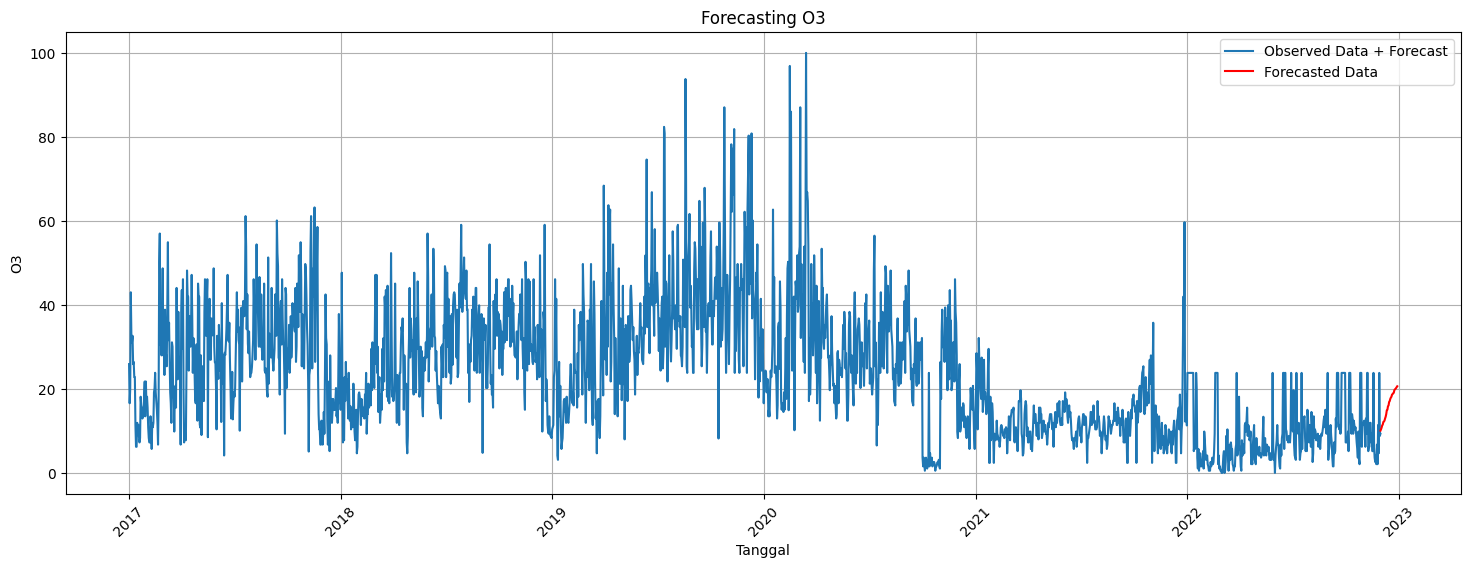

In [102]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'O3': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI4[['Tanggal', 'O3']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI4['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['O3'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('O3')
plt.title('Forecasting O3')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## RBF Kernel

In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="rbf", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI4['O3'].min()
max_par = DKI4['O3'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'O3': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI4['O3'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.172
MSE: 0.030
MAE: 0.158
R-Squared: -6.286
       Tanggal         O3
0   2022-11-30   6.217617
1   2022-12-01   2.072539
2   2022-12-02   0.000000
3   2022-12-03   0.000000
4   2022-12-04   1.554404
5   2022-12-05   5.699482
6   2022-12-06   9.844560
7   2022-12-07  13.989637
8   2022-12-08  19.067358
9   2022-12-09  23.316062
10  2022-12-10  25.699482
11  2022-12-11  26.424870
12  2022-12-12  26.943005
13  2022-12-13  27.046632
14  2022-12-14  27.046632
15  2022-12-15  27.046632
16  2022-12-16  27.046632
17  2022-12-17  27.046632
18  2022-12-18  27.046632
19  2022-12-19  27.046632
20  2022-12-20  27.046632
21  2022-12-21  27.046632
22  2022-12-22  27.046632
23  2022-12-23  27.046632
24  2022-12-24  27.046632
25  2022-12-25  27.046632
26  2022-12-26  27.046632
27  2022-12-27  27.046632
28  2022-12-28  27.046632
29  2022-12-29  27.046632


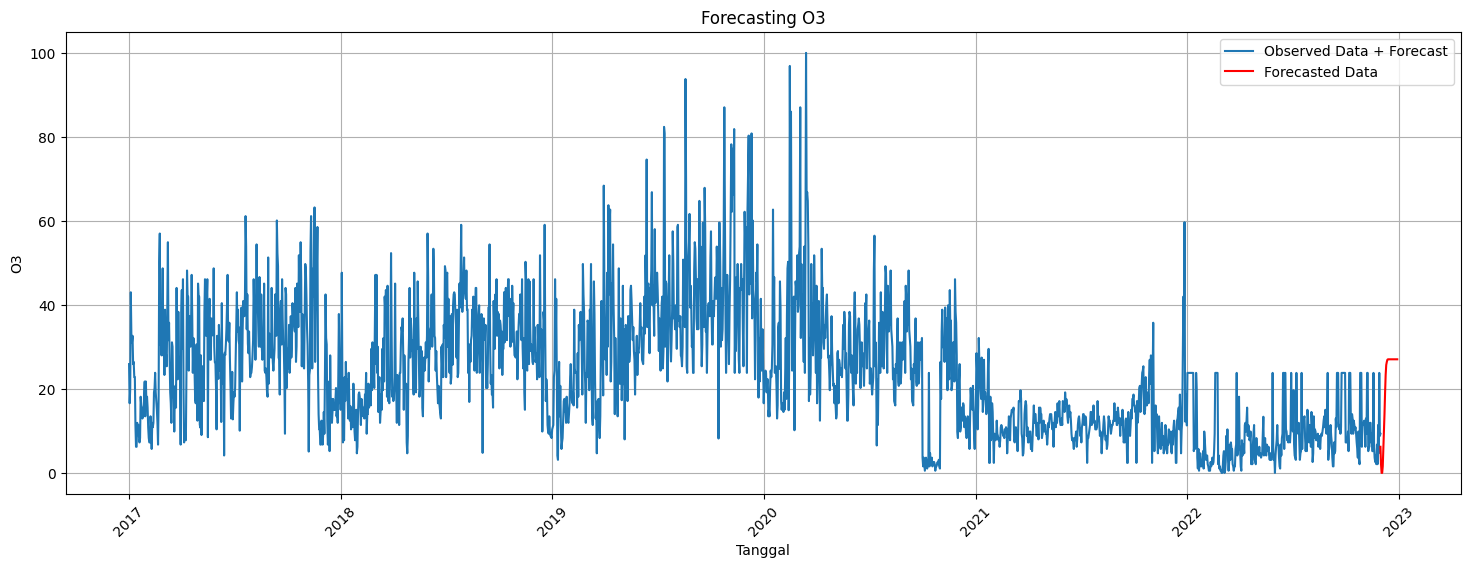

In [104]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'O3': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI4[['Tanggal', 'O3']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI4['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['O3'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('O3')
plt.title('Forecasting O3')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Linear

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="linear", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI4['O3'].min()
max_par = DKI4['O3'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'O3': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI4['O3'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.063
MSE: 0.004
MAE: 0.047
R-Squared: 0.006
       Tanggal        O3
0   2022-11-30  9.326425
1   2022-12-01  9.326425
2   2022-12-02  9.326425
3   2022-12-03  9.326425
4   2022-12-04  9.326425
5   2022-12-05  9.326425
6   2022-12-06  9.326425
7   2022-12-07  9.326425
8   2022-12-08  9.326425
9   2022-12-09  9.326425
10  2022-12-10  9.326425
11  2022-12-11  9.326425
12  2022-12-12  9.326425
13  2022-12-13  9.326425
14  2022-12-14  9.326425
15  2022-12-15  9.326425
16  2022-12-16  9.326425
17  2022-12-17  9.326425
18  2022-12-18  9.326425
19  2022-12-19  9.326425
20  2022-12-20  9.015544
21  2022-12-21  9.015544
22  2022-12-22  9.015544
23  2022-12-23  9.015544
24  2022-12-24  9.015544
25  2022-12-25  9.015544
26  2022-12-26  9.015544
27  2022-12-27  9.015544
28  2022-12-28  9.015544
29  2022-12-29  9.015544


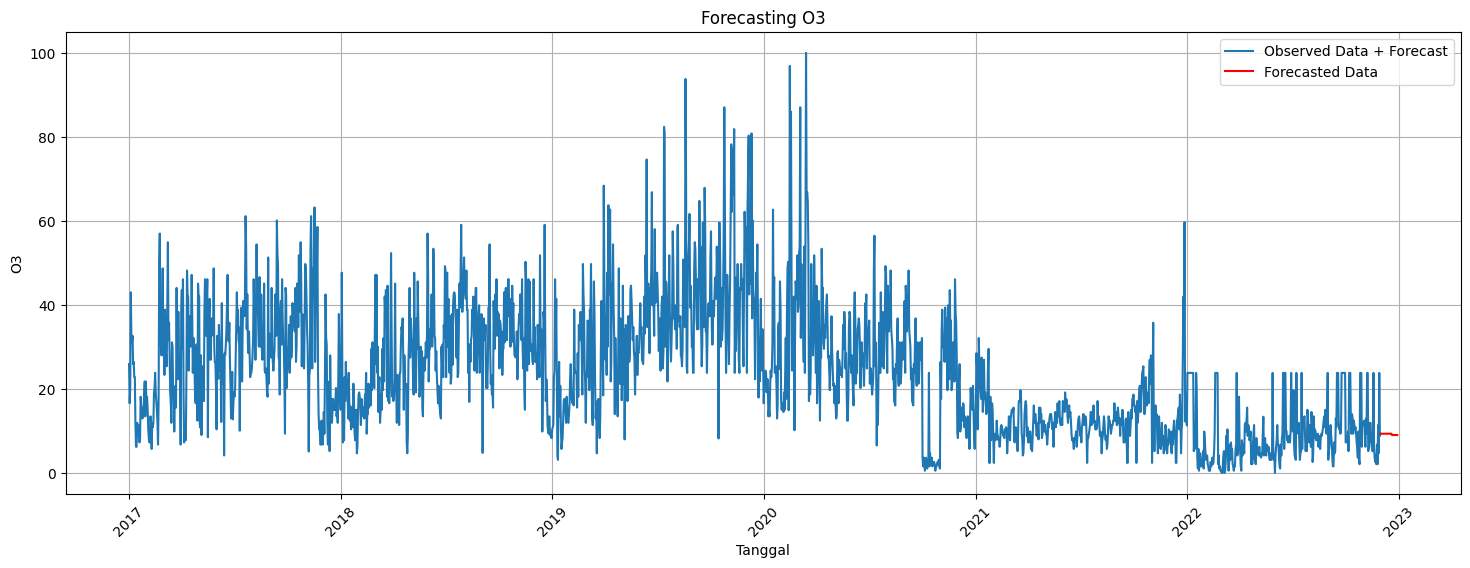

In [106]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'O3': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI4[['Tanggal', 'O3']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI4['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['O3'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('O3')
plt.title('Forecasting O3')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Sigmoid

In [107]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="sigmoid", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI4['O3'].min()
max_par = DKI4['O3'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'O3': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI4['O3'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.121
MSE: 0.015
MAE: 0.113
R-Squared: -2.605
       Tanggal         O3
0   2022-11-30  19.896373
1   2022-12-01  19.896373
2   2022-12-02  19.896373
3   2022-12-03  19.896373
4   2022-12-04  19.896373
5   2022-12-05  19.896373
6   2022-12-06  19.896373
7   2022-12-07  19.896373
8   2022-12-08  19.896373
9   2022-12-09  19.896373
10  2022-12-10  19.896373
11  2022-12-11  19.896373
12  2022-12-12  19.896373
13  2022-12-13  19.896373
14  2022-12-14  19.896373
15  2022-12-15  19.896373
16  2022-12-16  19.896373
17  2022-12-17  19.896373
18  2022-12-18  19.896373
19  2022-12-19  19.896373
20  2022-12-20  19.896373
21  2022-12-21  19.896373
22  2022-12-22  19.896373
23  2022-12-23  19.896373
24  2022-12-24  19.896373
25  2022-12-25  19.896373
26  2022-12-26  19.896373
27  2022-12-27  19.896373
28  2022-12-28  19.896373
29  2022-12-29  19.896373


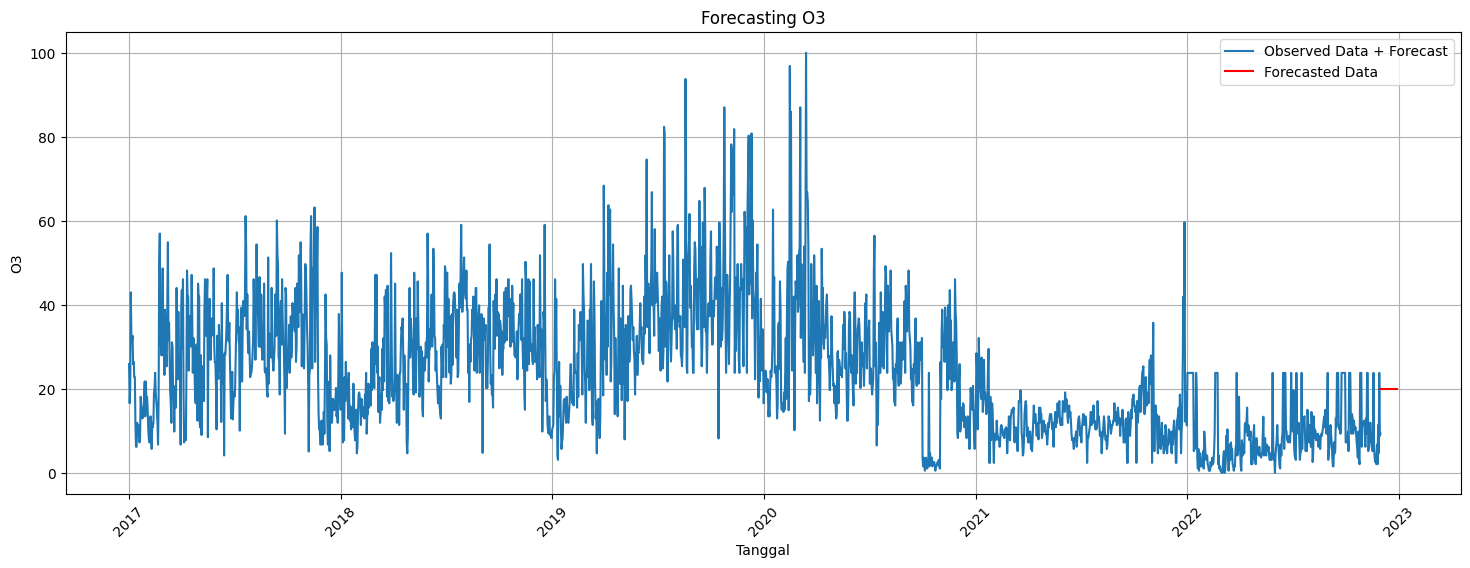

In [108]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'O3': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI4[['Tanggal', 'O3']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI4['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['O3'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('O3')
plt.title('Forecasting O3')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Cosine

In [109]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="cosine", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI4['O3'].min()
max_par = DKI4['O3'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'O3': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI4['O3'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.119
MSE: 0.014
MAE: 0.112
R-Squared: -2.501
       Tanggal         O3
0   2022-11-30  19.689119
1   2022-12-01  19.689119
2   2022-12-02  19.689119
3   2022-12-03  19.689119
4   2022-12-04  19.689119
5   2022-12-05  19.689119
6   2022-12-06  19.689119
7   2022-12-07  19.689119
8   2022-12-08  19.689119
9   2022-12-09  19.689119
10  2022-12-10  19.689119
11  2022-12-11  19.689119
12  2022-12-12  19.689119
13  2022-12-13  19.689119
14  2022-12-14  19.689119
15  2022-12-15  19.689119
16  2022-12-16  19.689119
17  2022-12-17  19.689119
18  2022-12-18  19.689119
19  2022-12-19  19.689119
20  2022-12-20  19.689119
21  2022-12-21  19.689119
22  2022-12-22  19.689119
23  2022-12-23  19.689119
24  2022-12-24  19.689119
25  2022-12-25  19.689119
26  2022-12-26  19.689119
27  2022-12-27  19.689119
28  2022-12-28  19.689119
29  2022-12-29  19.689119


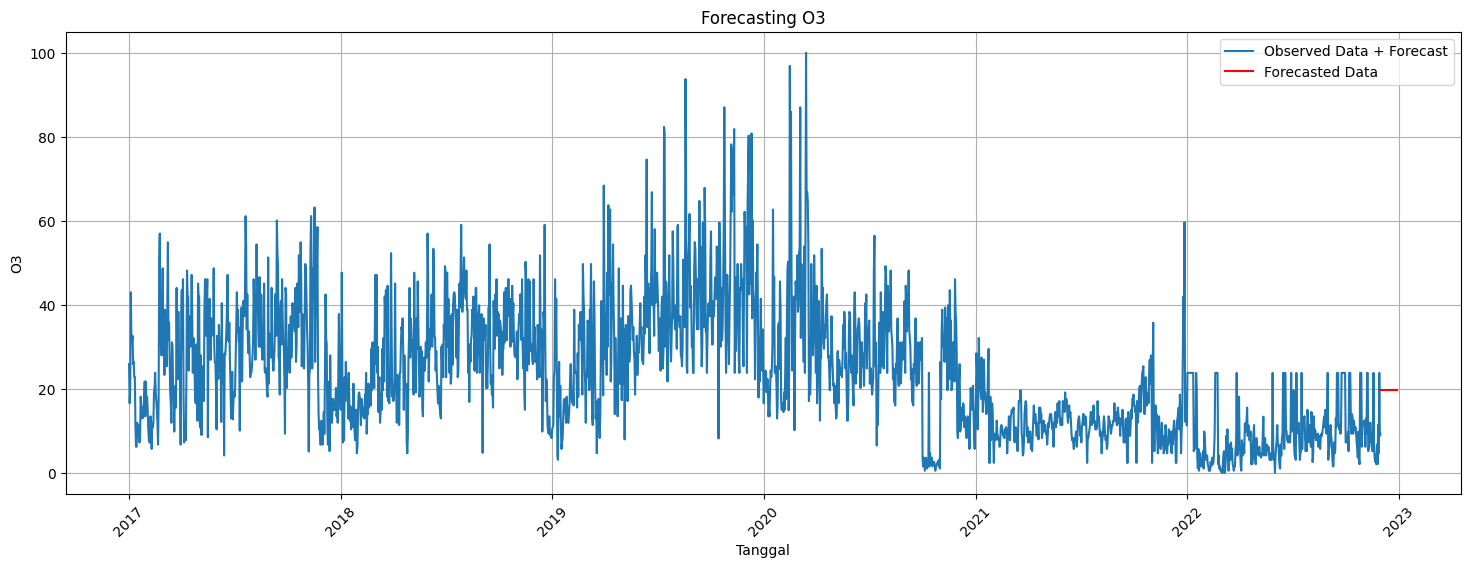

In [110]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'O3': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI4[['Tanggal', 'O3']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI4['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['O3'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('O3')
plt.title('Forecasting O3')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
